In [2]:
#Loading dataset
import warnings
import csv
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import missingno as msno #to visualise missing value
%matplotlib inline


#Data pre-processing
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold


#Data splitting
from sklearn.model_selection import train_test_split

#Data modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

from yellowbrick.style import set_palette
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

#Ensembling
from mlxtend.classifier import StackingCVClassifier

In [81]:
#loading dataset
df = pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [82]:
df.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [83]:
duplicated=df.duplicated().sum()
if duplicated:
    print('Duplicates rows in dataset are:{}'.format(duplicated))
else:
    print('No duplicate')

Duplicates rows in dataset are:723


In [84]:
duplicated=df[df.duplicated(keep=False)]
duplicated.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


DETECTING AND REMOVING OUTLIERS

NORMALIZATION

In [85]:
# --- Splitting Dataset into 70:30 ---
#X= df[['cp','thal','ca','exang','sex','slope','age','oldpeak']]
#y = df['target']


In [86]:
#SCALING OF DATA
scaler=MinMaxScaler()
feat= ['cp','thal','ca','exang','sex','slope','age','oldpeak','target']
df[feat]= scaler.fit_transform(df[feat])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,125,212,0,1,168,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,140,203,1,0,155,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,145,174,0,1,125,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,148,203,0,1,161,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,138,294,1,1,106,0.0,0.306452,0.5,0.75,0.666667,0.0


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features= ['age','oldpeak']
#df[features] = scaler.fit_transform(df[features])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,125,212,0,1,168,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,140,203,1,0,155,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,145,174,0,1,125,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,148,203,0,1,161,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,138,294,1,1,106,0.0,0.306452,0.5,0.75,0.666667,0.0


In [88]:
X=df.drop("target",axis=1).values
y=df.target.values

In [89]:
#X=X.astype(float)
#X

In [90]:
y

array([0., 0., 0., ..., 0., 1., 0.])

TRAIN DATA

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [92]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (717, 13) (308, 13)


In [93]:
X

array([[0.47916667, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.4375    , 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.52083333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

DECISION TREE

confusion matrix
dt_conf_matrix


Accuracy of Decision tree model: 0.9253246753246753 

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93       156
         1.0       0.91      0.94      0.93       152

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308



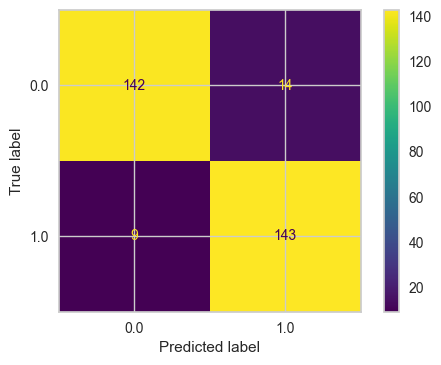

In [94]:
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
dt.fit(X_train, y_train)
dtpred=dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dtpred)
dt_acc_score= accuracy_score(y_test, dtpred)
print('confusion matrix')
print('dt_conf_matrix')
print('\n')
print('Accuracy of Decision tree model:',dt_acc_score,'\n')
print(classification_report(y_test,dtpred))


plot_confusion_matrix(dt, X_test, y_test)

plt.show()

In [95]:
acc_test_dt = round(dt.score(X_test, y_test) * 100, 2)
acc_test_dt

92.53

RANDOM FOREST

confusion matrix
[[135  21]
 [  7 145]]


Accuracy of Random Forest: 0.9090909090909091 

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91       156
         1.0       0.87      0.95      0.91       152

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308



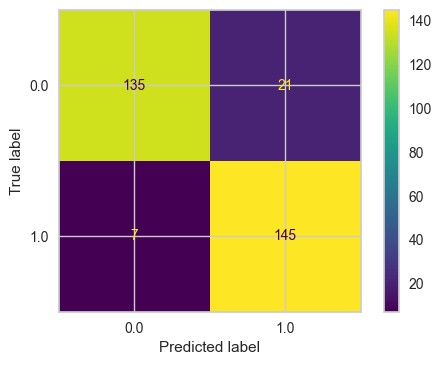

In [96]:
m3='Random Forest Classifier'
rf=RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted=rf.predict(X_test)
rf_conf_matrix=confusion_matrix(y_test, rf_predicted)
rf_acc_score=accuracy_score(y_test, rf_predicted)
print('confusion matrix')
print(rf_conf_matrix)
print('\n')
print('Accuracy of Random Forest:', rf_acc_score,'\n')
print(classification_report(y_test,rf_predicted))


plot_confusion_matrix(rf, X_test, y_test)

plt.show()

In [97]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
xgb = XGBClassifier()

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train,y_train)

random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
m4= 'Extreme Gradient Boost'
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X, y, cv=10)
score.mean()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 97.40%
confusion matrix
[[153   3]
 [  5 147]]


Accuracy of Extreme Boost: 0.974025974025974 

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       156
         1.0       0.98      0.97      0.97       152

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



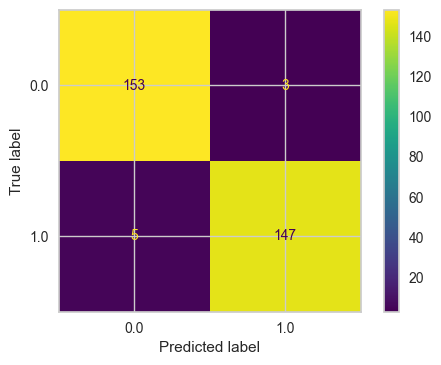

In [99]:
xgb.fit(X_train,y_train)
xgb_predicted = xgb.predict(X_test)
accuracy = accuracy_score(y_test, xgb_predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
xgb_conf_matrix=confusion_matrix(y_test, xgb_predicted)
xgb_acc_score=accuracy_score(y_test, xgb_predicted)
print('confusion matrix')
print(xgb_conf_matrix)
print('\n')
print('Accuracy of Extreme Boost:', xgb_acc_score, '\n')
print(classification_report(y_test,xgb_predicted))


plot_confusion_matrix(xgb, X_test, y_test)

plt.show()

FEATURE IMPORTANCE

In [100]:
#xgb = XGBClassifier(max_depth=6)
#xgb.fit(X,y)
#train_features = X.columns
#importances = xgb.feature_importances_
#indices = np.argsort(importances)
# indices
#plt.title('Feature Importance')
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [train_features[i] for i in indices])
#plt.xlabel('Relative Importance')
#plt.show()

ROC CURVE

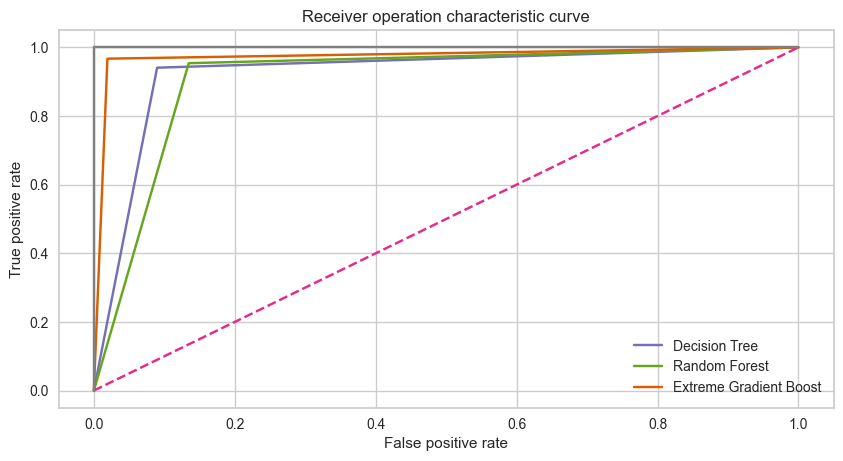

In [101]:
dt_false_positive_rate,dt_true_positive_rate,dt_threshold= roc_curve(y_test,dtpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold= roc_curve(y_test,rf_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold= roc_curve(y_test,xgb_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver operation characteristic curve')
plt.plot(dt_false_positive_rate,dt_true_positive_rate, label='Decision Tree')
plt.plot(rf_false_positive_rate,rf_true_positive_rate, label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate, label='Extreme Gradient Boost')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [102]:
model_ev= pd.DataFrame({'Model':['Decision tree','Random Forest','Extreme Gradient Boost'], 'Accuracy': [dt_acc_score,rf_acc_score,xgb_acc_score]})
model_ev

,Model,Accuracy
0,Decision tree,0.925325
1,Random Forest,0.909091
2,Extreme Gradient Boost,0.974026


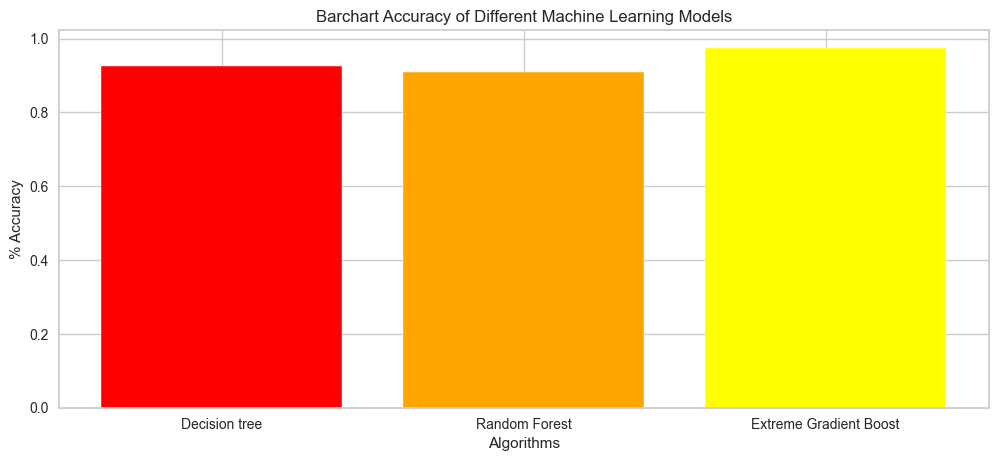

In [103]:
colors=['red','orange','yellow','green','blue','gold','orange',]
plt.figure(figsize=(12,5))
plt.title('Barchart Accuracy of Different Machine Learning Models')
plt.xlabel('Algorithms')
plt.ylabel('% Accuracy')
plt.bar(model_ev['Model'],model_ev['Accuracy'],color=colors)
plt.show()

USING VOTING CLASSIFIER AS ENSEMBLE TO SELECT BEST MODEL


 The total of training dataset (717, 13)

 The total of test dataset (308, 13)

------------------------------

 Random Forest: : 1.000

 Decision Tree: : 0.990

 Extreme Gradient Boost: : 0.990

 Voting Classifier 0.990


Accuracy of VotingClassifier: 0.9902597402597403 

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       156
         1.0       1.00      0.98      0.99       152

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



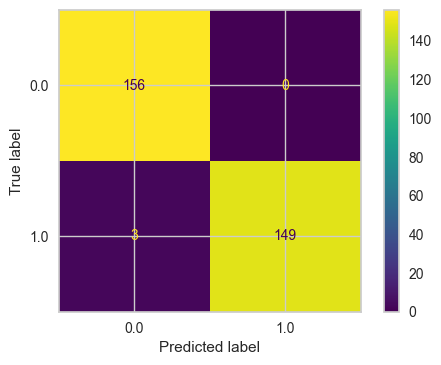

In [104]:
#check the dimension of train and test data
print('\n The total of training dataset', X_train.shape)
print('\n The total of test dataset', X_test.shape)
print('\n------------------------------')

#Instantiate the models
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
xgb=XGBClassifier()
classifier_list=[('Random Forest:',rf),('Decision Tree:',dt),('Extreme Gradient Boost:',xgb)]



#declare a create loop to iterate through the models
for clsf_name, clsf in classifier_list:
     clsf.fit(X_train, y_train)#fit each model


     y_pred=clsf.predict(X_test) #predict the label on test set for each models
     print('\n {:s} : {:.3f}'.format(clsf_name, accuracy_score(y_test,y_pred))) #print evaluation score


vc=VotingClassifier(estimators=classifier_list) #instantiating the voting classifier
vc.fit(X_train,y_train) #fit vc to the training set and labels

y_pred_vc=clsf.predict(X_test) #predict test label vc

print('\n Voting Classifier {:.3f}'.format(accuracy_score(y_test,y_pred_vc)))

vc_acc_score= accuracy_score(y_test, y_pred_vc)
print('\n')
print('Accuracy of VotingClassifier:',vc_acc_score,'\n')
print(classification_report(y_test,y_pred_vc))

plot_confusion_matrix(vc, X_test, y_test)

plt.show()

In [105]:
#CHECKING THE FITTING STATUS OF ENSEMBLE MODEL
#instantiate cross validation
kfold_split=KFold(n_splits=10)

for clsf_name, clsf in classifier_list:
     clsf.fit(X_train, y_train)#fit each model

 #compute the array containig the 10-folds CV MSEs
     CV_scores_clsf=-cross_val_score(clsf,X_train, y_train, cv=kfold_split)
     print('\nCross Val mean: {:.3f} (std: {:.3f})'.format(CV_scores_clsf.mean()*-1, CV_scores_clsf.std()),end='\n\n')

     #predict and calculate the accuracy on test data for each model
     y_pred_test_clsf= clsf.predict(X_test)
     print('\n{:s} Test : {:.3f}'.format(clsf_name, accuracy_score(y_test, y_pred_test_clsf)), '\n')

 #predict and calculate the accuracy on train data for each model
     y_pred_train_clsf= clsf.predict(X_train)
     print('\n{:s} Train : {:.3f}'.format(clsf_name, accuracy_score(y_train, y_pred_train_clsf)), '\n')
     print('-------------------------------------------')

     #instantiate the voting classifier
     vc=VotingClassifier(estimators= classifier_list)

     #fit vc to the training set and labels
     vc.fit(X_train, y_train)

     #compute the array containing the 10 folds CV MSEs
     CV_scores_vc=-cross_val_score(vc,X_train, y_train, cv=10)
     print('\nCross Val mean: {:.3f} (std: {:.3f})'.format(CV_scores_vc.mean()*-1,CV_scores_vc.std()),end='\n\n')

     #lets predict the label for training set
     y_pred_train_vc=vc.predict(X_train)
     print('\nVoting Classifier Train {:.3f}'.format(accuracy_score(y_train, y_pred_train_vc)), '\n')





Cross Val mean: 0.976 (std: 0.015)


Random Forest: Test : 1.000 


Random Forest: Train : 1.000 

-------------------------------------------

Cross Val mean: 0.987 (std: 0.013)


Voting Classifier Train 1.000 


Cross Val mean: 0.972 (std: 0.022)


Decision Tree: Test : 0.990 


Decision Tree: Train : 1.000 

-------------------------------------------

Cross Val mean: 0.987 (std: 0.013)


Voting Classifier Train 1.000 


Cross Val mean: 0.983 (std: 0.015)


Extreme Gradient Boost: Test : 0.990 


Extreme Gradient Boost: Train : 1.000 

-------------------------------------------

Cross Val mean: 0.980 (std: 0.018)


Voting Classifier Train 1.000 



SAVING MODEL IN JOBLIB FILE

In [106]:
import joblib
joblib.dump(vc,'final_model')


['final_model']

In [107]:
model = joblib.load('final_model')
model.predict(X_test)

array([1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0.